In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\win15\\OneDrive\\Desktop\\School\\Fall2021\\ECGR-4105 Intro to Machine Learning\\Jupyter Notebook\\Engineering_graduate_salary.csv")

In [3]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

**Finding categorical variables**

In [5]:


# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)



There are 7 categorical variables

The categorical variables are :

 ['Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


In [6]:
df[categorical].head()

,Gender,DOB,10board,12board,Degree,Specialization,CollegeState
0,f,1990-10-22,cbse,cbse,B.Tech/B.E.,instrumentation and control engineering,Delhi
1,m,1990-05-15,cbse,cbse,B.Tech/B.E.,computer science & engineering,Uttar Pradesh
2,m,1989-08-21,"maharashtra state board,pune",amravati divisional board,B.Tech/B.E.,electronics & telecommunications,Maharashtra
3,m,1991-05-04,cbse,cbse,B.Tech/B.E.,computer science & engineering,Delhi
4,f,1990-10-30,cbse,cbse,B.Tech/B.E.,biotechnology,Tamil Nadu


In [7]:
df[categorical].isnull().sum()

Gender            0
DOB               0
10board           0
12board           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

**Viewing Frequency counts of values in categorical variables**

In [8]:
for var in categorical: 
    print(df[var].value_counts())

m    2282
f     716
Name: Gender, dtype: int64
1991-07-03    7
1991-07-31    6
1990-08-08    6
1991-07-15    6
1990-10-11    6
             ..
1991-03-11    1
1985-04-14    1
1991-04-29    1
1989-05-02    1
1989-08-27    1
Name: DOB, Length: 1633, dtype: int64
cbse                                           1026
state board                                     881
0                                               256
icse                                            213
ssc                                              96
                                               ... 
pune board                                        1
little jacky matric higher secondary school       1
aurangabad board                                  1
sslc,karnataka                                    1
kerala state technical education                  1
Name: 10board, Length: 221, dtype: int64
cbse                                           1039
state board                                     948
0                     

**Frequency distribution of categorical variables**

In [9]:
for var in categorical:
    print(df[var].value_counts()/float(len(df)))

m    0.761174
f    0.238826
Name: Gender, dtype: float64
1991-07-03    0.002335
1991-07-31    0.002001
1990-08-08    0.002001
1991-07-15    0.002001
1990-10-11    0.002001
                ...   
1991-03-11    0.000334
1985-04-14    0.000334
1991-04-29    0.000334
1989-05-02    0.000334
1989-08-27    0.000334
Name: DOB, Length: 1633, dtype: float64
cbse                                           0.342228
state board                                    0.293863
0                                              0.085390
icse                                           0.071047
ssc                                            0.032021
                                                 ...   
pune board                                     0.000334
little jacky matric higher secondary school    0.000334
aurangabad board                               0.000334
sslc,karnataka                                 0.000334
kerala state technical education               0.000334
Name: 10board, Length: 221, dtype:

In [10]:
df[categorical].isnull().sum()


Gender            0
DOB               0
10board           0
12board           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

**Checking for cardinality in categorical variables**

In [11]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels
DOB  contains  1633  labels
10board  contains  221  labels
12board  contains  277  labels
Degree  contains  4  labels
Specialization  contains  42  labels
CollegeState  contains  26  labels


**Numerical Varables**

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 27 numerical variables

The numerical variables are : ['ID', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


In [13]:
df[numerical].head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,87.80,2009,84.00,6920,1,73.82,6920,1,2013,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,57.00,2010,64.50,6624,2,65.00,6624,0,2014,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,77.33,2007,85.17,9084,2,61.94,9084,0,2011,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,84.30,2009,86.00,8195,1,80.40,8195,1,2013,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,82.00,2008,75.00,4889,2,64.30,4889,1,2012,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [14]:
df[numerical].isnull().sum()

ID                       0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

**Declaring Variables**

In [30]:
X = df.drop(['ID', 'Specialization'], axis = 1)
y = df['Specialization']
Z = df.loc[:,['CollegeTier', 'agreeableness','12graduation']]

In [32]:
X.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [34]:
X_train.shape, X_test.shape

((899, 32), (2099, 32))

In [35]:
X_train.dtypes

Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to

**Encoding Categorical Variables**

In [41]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Gender', 'DOB', '10board', '12board', 'Degree', 'CollegeState']

In [44]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

X_train[categorical].head()

,Gender,DOB,10board,12board,Degree,CollegeState
1524,m,1988-05-29,central board of secondary education,central board of secondary education,B.Tech/B.E.,Punjab
1034,m,1989-10-01,state board,cbse,B.Tech/B.E.,Rajasthan
83,m,1992-08-01,cbse,cbse,B.Tech/B.E.,Uttar Pradesh
79,m,1989-08-17,up,up,B.Tech/B.E.,Uttar Pradesh
662,m,1986-06-05,gyan bharati school,dav public school,B.Tech/B.E.,West Bengal


In [45]:
import category_encoders as ce

In [46]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['Gender', 'DOB', '10board', '12board', 'Degree','CollegeState'])

In [47]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [48]:
X_train.head()

,Gender_1,Gender_2,DOB_1,DOB_2,DOB_3,DOB_4,DOB_5,DOB_6,DOB_7,DOB_8,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
1524,1,0,1,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1.4992,0.1888,-0.7794,0.41480,0.0284,300000
1034,1,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,-1,0.2718,1.0449,1.5470,-0.23440,1.6302,180000
83,1,0,0,0,1,0,0,0,0,0,...,-1,-1,-1,-1,-2.2720,0.0328,-0.2714,1.11990,-0.4455,335000
79,1,0,0,0,0,1,0,0,0,0,...,-1,-1,-1,-1,0.8192,0.5008,0.2366,-0.05527,0.6603,120000
662,1,0,0,0,0,0,1,0,0,0,...,-1,-1,-1,-1,-2.2720,-2.7754,-1.6502,0.41480,-2.3412,150000


In [49]:
cols = X_train.columns

In [50]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [52]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [53]:
X_train.head()

,Gender_1,Gender_2,DOB_1,DOB_2,DOB_3,DOB_4,DOB_5,DOB_6,DOB_7,DOB_8,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.061297,-0.018909,-0.678880,0.390803,0.000000,0.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.205422,0.667014,1.134794,-0.041043,1.393233,-0.607595
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.614048,-0.143899,-0.282841,0.859833,-0.412194,0.177215
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.596953,0.231071,0.113199,0.078114,0.549622,-0.911392
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.614048,-2.393879,-1.357761,0.390803,-2.061059,-0.759494


In [54]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = gnb.predict(X_test)

y_pred

array(['information technology',
       'electronics and communication engineering',
       'electronics and electrical engineering', ..., 'biotechnology',
       'electronics & telecommunications',
       'computer science & engineering'], dtype='<U43')

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1963


In [57]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9344
Test set score: 0.1963


In [58]:
# check class distribution in test set
y_test.value_counts()

electronics and communication engineering      440
computer science & engineering                 389
information technology                         361
computer engineering                           305
computer application                           141
mechanical engineering                         113
electronics and electrical engineering         105
electronics & telecommunications                62
electrical engineering                          51
electronics & instrumentation eng               18
information science engineering                 13
instrumentation and control engineering         12
electronics and instrumentation engineering     11
civil engineering                                9
biotechnology                                    8
electronics engineering                          7
other                                            6
industrial & production engineering              6
mechanical and automation                        5
computer science and technology

In [66]:
# check null accuracy score
#
null_accuracy = (440/(440+389+361+305+141+113+105+62+51+18+13+12+11+9+8+7+6+6+5+4+4+4+3+3+2+2+2+2+2+9))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.2096


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

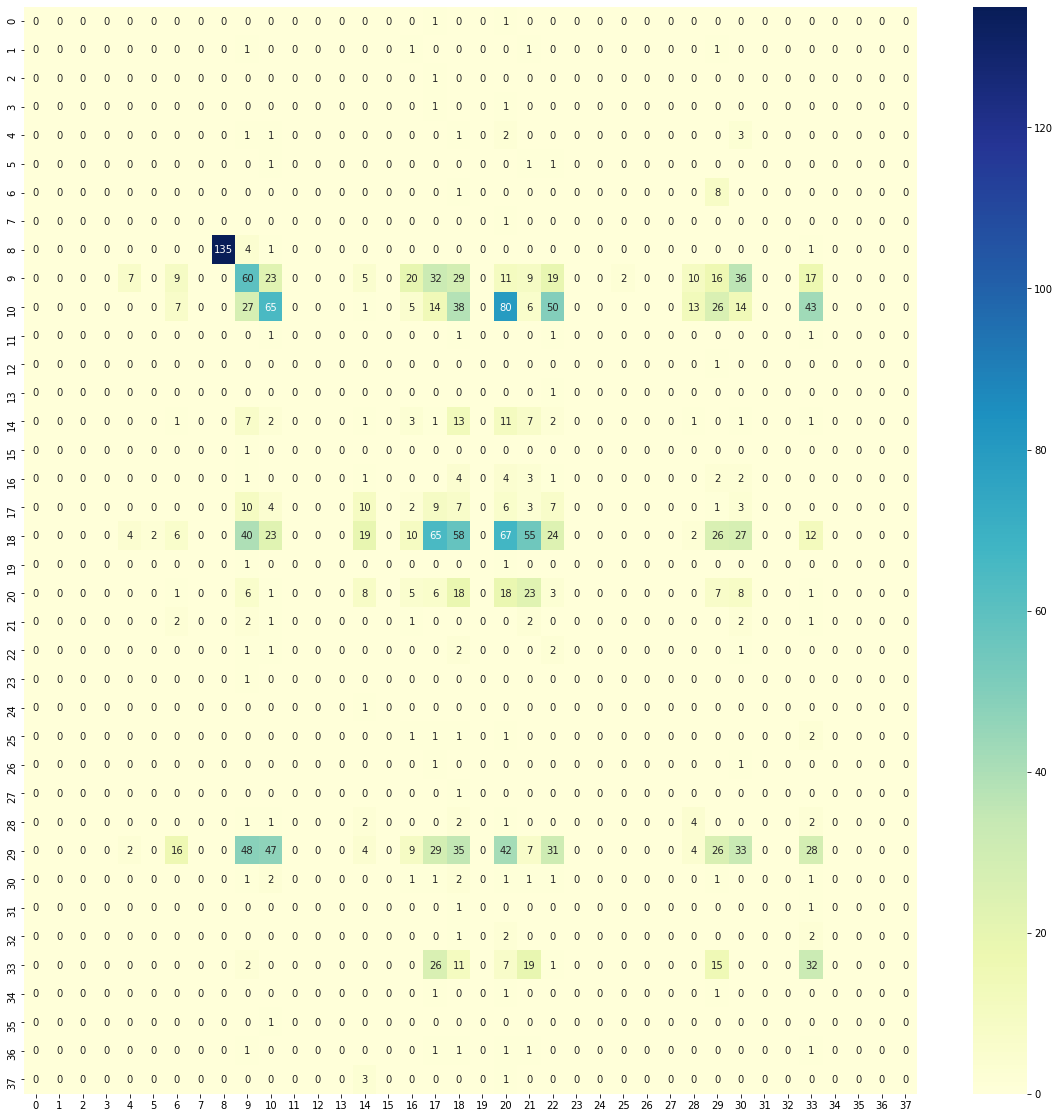

In [64]:
cm_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(20,20))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                             precision    recall  f1-score   support

                   aeronautical engineering       0.00      0.00      0.00         2
    applied electronics and instrumentation       0.00      0.00      0.00         4
          automobile/automotive engineering       0.00      0.00      0.00         1
                     biomedical engineering       0.00      0.00      0.00         2
                              biotechnology       0.00      0.00      0.00         8
                       chemical engineering       0.00      0.00      0.00         3
                          civil engineering       0.00      0.00      0.00         9
     computer and communication engineering       0.00      0.00      0.00         1
                       computer application       1.00      0.96      0.98       141
                       computer engineering       0.28      0.20      0.23       305
             computer science & engineering       0.37      0.17

E:\win15\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\win15\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\win15\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
